# Các mẫu thiết kế GOF : Iterator

**BS.Lê Ngọc Khả Nhi**


# Giới thiệu

Iterator là một mẫu thiết kế thuộc lớp Hành vi, nó cho phép thiết lập một quy trình dựa trên cơ chế liệt kê tuần tự các phần tử trong một tập hợp (collection) nhưng ẩn giấu cơ chế này đối với người dùng. Khi sử dụng, người dùng chỉ cần gọi các method đơn giản để thi hành quy trình mà không cần biết đến bản chất của collection (cấu trúc dữ liệu gì, vận hành ra sao...).

# Thí dụ minh họa

Khi vẽ biểu đồ thống kê và muốn tô màu theo phân nhóm, ta thường phải chuẩn bị một phổ màu dưới dạng dictionary có cấu trúc {key: hexcolor value} với key là những bậc giá trị của 1 biến phân loại, còn hexcolor value là mã màu thập lục phân. Sau đó, sử dụng vòng lặp ta có thể vẽ các layer khác nhau bằng matplotlib cho mỗi phân nhóm. 

Một chuyên viên thống kê khá lười biếng (mà những người lười thường rất thông minh), muốn dùng một class để tự động tạo ra dictionary phổ màu cho một danh sách string bất kì. Anh ta có thể dùng mẫu thiết kế Iterator để làm việc này như sau:

# Giải quyết bằng thiết kế Iterator

Theo lý thuyết, quy trình iteration trên một collection cần 2 methods next() và done(), method next() sẽ tuần tự truy xuất mỗi phần tử trong tập hợp, method done() kiểm tra xem đã khai thác đến phần tử sau cùng hay chưa, nếu không còn phần tử nào, nó sẽ xuất ra giá trị True.

Tuy nhiên, Python đã dựng sẵn cho chúng ta protocol iteration và hỗ trợ quy trình Iteration một cách phổ quát. Đặc biệt, Python không dùng method done() mà chỉ dùng 1 method next() và cơ chế Exception. 

Khi triển khai mẫu thiết kế Iterator, ta cần 2 abstract base class là Iterator và Iterable từ module collections.abc; Chương trình có 2 bộ phận: 1 class có vai trò là iterator, nó kế thừa  abstract base class Iterator, để có thể vận hành method next() bên trong; 1 class thứ hai kế thừa abstract base class Iterable, nó có vai trò chứa collection, làm đối tượng cho class Iterator khai thác, và dùng method iter() để tạo ra 1 instance của class Iterator. 

Nói về collection, đó là một cấu trúc dữ liệu, từ đơn giản, như list, set, tuple... đến phức tạp, như dictionary, tree, graph, ...Collection nằm trong class Iterable như 1 thuộc tính. Ta có thể gia công thêm những method cho phép thay đổi, cập nhật nội dung bên trong collection, thí dụ thêm/bớt phần tử.

Trong trường hợp hiện tại, tính năng xuất ra phổ màu sẽ được thực thi thông qua một vài method khác, thí dụ get_color_palette() xuất ra dictionary ta cần, hay show_color_palette, hiển thị phổ màu một cách trực quan thành hình vẽ.

## Cấu trúc module:

Sơ đồ UML của hệ thống như sau:

!['uml'](Iterator_UML.png)

Nội dung của code nằm trong module builder.py tại: https://github.com/kinokoberuji/Python-snipets/blob/master/GOF/Iterator/Iterator.py

In [10]:
from __future__ import annotations
from typing import List, Dict

import seaborn as sns
import matplotlib.pyplot as plt

from collections.abc import Iterable, Iterator

# Vận dụng mẫu thiết kế Iterator để tạo một phổ màu từ một tập hợp n keys

class ColorIterator(Iterator):

    """Class Iterator"""

    def __init__(self, key_lst: Color_Collection, palette: str = "husl") -> None:

        self.key_lst = key_lst
        self.index = 0
        self.colors = sns.color_palette(palette, len(key_lst)).as_hex()

    def __next__(self) -> Dict[str, str]:
        try:
            key = self.key_lst[self.index]
            color = self.colors[self.index]
            self.index += 1
            return {key: color}

        except IndexError:
            raise StopIteration()


class Color_Collection(Iterable):

    """Class quản lý tập hợp keys và tạo phổ màu"""

    def __init__(self, key_lst: List[str]) -> None:
        self.key_lst = key_lst

    def __iter__(self, *args, **kwargs) -> ColorIterator:
        return ColorIterator(self.key_lst, *args, **kwargs)

    def add_item(self, key: str) -> None:
        self.key_lst.append(key)

    def remove_var(self, key: str) -> None:
        self.key_lst.remove(key)

    def __len__(self) -> int:
        return len(self.key_lst)

    def get_color_palette(self, *args, **kwargs) -> Dict[str, str]:

        if not self.key_lst:
            raise ValueError("Lỗi: key list rỗng")

        color_dict = {}
        for color in ColorIterator(self.key_lst, *args, **kwargs):
            color_dict.update(color)

        return color_dict

    def show_color_palette(self, *args, **kwargs) -> None:
        color_dict = self.get_color_palette(*args, **kwargs)
        sns.palplot(sns.color_palette(list(color_dict.values())))
        plt.show()

    def __repr__(self) -> str:
        return f"Phổ màu cho tập hợp ({self.key_lst})"

# Sử dụng chương trình

In [1]:
from Iterator import *

Giả sử ta có x là 1 biến phân nhóm có 6 bậc giá trị

In [5]:
import pandas as pd

def simulate_cat_serie(n: int, levels: int) -> pd.Series:
    """
    Simulate a pandas series of n observations of categorical data with levels levels of values
    """
    return pd.Series(np.random.randint(0, levels, n))

In [8]:
x = simulate_cat_serie(100, 6)

x = x.map({k:v for v,k in zip(list('ABCDEF'),x.unique())})

x

0     A
1     B
2     C
3     D
4     E
     ..
95    B
96    D
97    D
98    C
99    A
Length: 100, dtype: object

In [9]:
x.unique()

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

Ta muốn tạo một phổ màu cho 6 bậc giá trị A,B,C,D,E,F này

Đầu tiên ta khởi tạo pals là 1 instance của class Color_collection (vai trò Iterable, chứa collection)

In [11]:
pals = Color_Collection([])

Khi mới khởi tạo, collection bên trong pals rỗng, ta có thể đưa 6 phần tử A,B,C,D,E,F vào collection như sau;

In [13]:
for k in x.unique():
    pals.add_item(k)

In [ ]:
Lúc này, collection đã hình thành, 

In [14]:
pals

Phổ màu cho tập hợp (['A', 'B', 'C', 'D', 'E', 'F'])

Ta có thể dùng 2 method show_color_palette và get_color_palette:

Lưu ý: nếu không khai báo argument tên phổ màu, chương trình sẽ mặc định dùng phổ màu husl (phong cách ggpplot2)

In [15]:
pals.get_color_palette()

{'A': '#f77189',
 'B': '#bb9832',
 'C': '#50b131',
 'D': '#36ada4',
 'E': '#3ba3ec',
 'F': '#e866f4'}

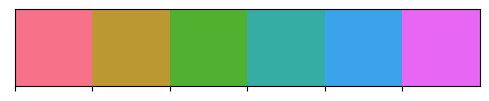

In [16]:
pals.show_color_palette()

Ta hoàn toàn có thể thay đổi phổ màu khác:

Phổ màu Set1


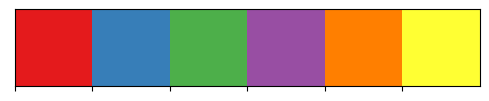

Phổ màu Set3


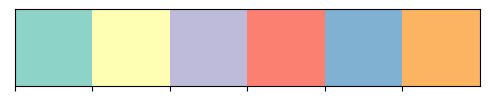

Phổ màu Spectral


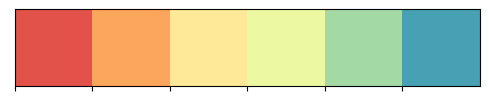

Phổ màu rainbow


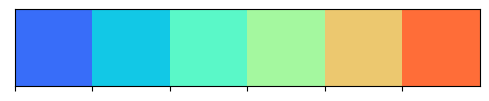

In [20]:
for col in ['Set1','Set3','Spectral','rainbow']:
    print(f"Phổ màu {col}")
    pals.show_color_palette(col)

# Nhận xét

Iterator là một thiết kế rất mạnh và hiệu quả cho mọi vấn đề có liên quan đến cơ chế truy xuất, hoán chuyển tuần tự các phần tử từ một tập hợp, hoặc ánh xạ 2 tập hợp như trong thí dụ trên. Thiết kế này mang lại những ưu điểm sau đây:

Cho phép triển khai và đồng thời che giấu bản chất của những cấu trúc dữ liệu (collection) rất phức tạp (thí dụ stacks, queue, tree, graph..., cũng như các cơ chế truy xuất phức tạp trên cấu trúc dữ liệu đó, thí dụ breadth-first hay depth-first trên tree data structure. Người dùng hoàn toàn không phải bận tâm về những điều này.

Thỏa tiêu chí Open/Close: cho phép mở rộng chương trình một cách giản dị: ta có thể triển khai một cấu trúc dữ liệu (collection) mới, một quy trình traversal hiệu quả hơn, và đưa nó vào chương trình mà không ảnh hưởng gì đến những bộ phận khác.

Cùng một collection có thể được khai thác song song bởi nhiều iterator object, bởi vì mỗi instance của class Iterator là độc lập, chúng có trạng thái iteration riêng biệt. 

Tuy nhiên, thiết kế này có thể không cần thiết cho những vấn đề quá đơn giản, cấu trúc collection đơn giản, ta hoàn toàn có thể dùng vòng lặp và viết hàm và mọi thứ đều ổn.

Bài thực hành đã hết. Chúc các bạn thực hành vui và hẹn gặp lại !